In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}

In [2]:
tf.__version__

'1.15.0'

In [3]:
tf.set_random_seed(1)
np.random.seed(1)

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
x = input_data.read_data_sets("MNIST_data/", one_hot=True)  # y labels are oh-encoded

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
n_train = x.train.num_examples
n_validation = x.validation.num_examples
n_test = x.test.num_examples
print("Size of:")
print("- Training-set:\t",n_train)
print("- Test-set:\t",n_test)
print("- Validation-set:",n_validation)

Size of:
- Training-set:	 55000
- Test-set:	 10000
- Validation-set: 5000


In [6]:
input_x = tf.placeholder(tf.float32, [None, 784])
output_y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [7]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape((28,28)), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

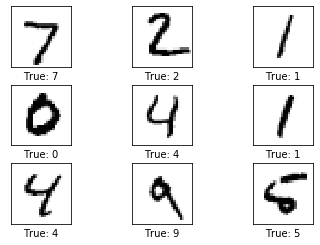

In [8]:
x.test.cls = np.argmax(x.test.labels, axis=1)
# Get the first images from the test-set.
images = x.test.images[0:9]

# Get the true classes for those images.
cls_true = x.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [9]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([784, 512], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([512, 128], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([128, 50], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([50, 10], stddev=0.1)),
}
biases = {
    'b1': tf.Variable(tf.constant(.01, shape=[512])),
    'b2': tf.Variable(tf.constant(.01, shape=[128])),
    'b3': tf.Variable(tf.constant(.01, shape=[50])),
    'out': tf.Variable(tf.constant(.01, shape=[10]))
}
layer_1 = tf.add(tf.matmul(input_x, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [10]:
loss = tf.losses.mean_squared_error(output_y, output_layer)
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

In [11]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(output_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [12]:
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    print(variable)
    shape = variable.get_shape()
    print(shape)
    #print(len(shape))
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32_ref>
(784, 512)
401408
<tf.Variable 'Variable_1:0' shape=(512, 128) dtype=float32_ref>
(512, 128)
65536
<tf.Variable 'Variable_2:0' shape=(128, 50) dtype=float32_ref>
(128, 50)
6400
<tf.Variable 'Variable_3:0' shape=(50, 10) dtype=float32_ref>
(50, 10)
500
<tf.Variable 'Variable_4:0' shape=(512,) dtype=float32_ref>
(512,)
512
<tf.Variable 'Variable_5:0' shape=(128,) dtype=float32_ref>
(128,)
128
<tf.Variable 'Variable_6:0' shape=(50,) dtype=float32_ref>
(50,)
50
<tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>
(10,)
10
474544


In [13]:
sess = tf.Session()# control training and others

In [14]:
sess.run(tf.global_variables_initializer())# initialize var in graph

In [15]:
# train on mini batches
import random as rd
loss_list=[]
train_accuracy_list = []
for i in range(5000):
    batch_x, batch_y = x.train.next_batch(500)
    sess.run(train_op, feed_dict={input_x: batch_x, output_y: batch_y, keep_prob: 0.5})

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run([loss, accuracy],feed_dict={input_x: batch_x, output_y: batch_y, keep_prob: 1.0})
        print("Iteration",str(i),"\t| Loss =",str(minibatch_loss),"\t| Accuracy =",str(minibatch_accuracy))
    loss_list.append(float(minibatch_loss))
    train_accuracy_list.append(float(minibatch_accuracy))

Iteration 0 	| Loss = 1.1429334 	| Accuracy = 0.09
Iteration 100 	| Loss = 0.070004806 	| Accuracy = 0.688
Iteration 200 	| Loss = 0.057950493 	| Accuracy = 0.756
Iteration 300 	| Loss = 0.05275521 	| Accuracy = 0.788
Iteration 400 	| Loss = 0.050409522 	| Accuracy = 0.808
Iteration 500 	| Loss = 0.047369253 	| Accuracy = 0.824
Iteration 600 	| Loss = 0.047253978 	| Accuracy = 0.83
Iteration 700 	| Loss = 0.047382697 	| Accuracy = 0.812
Iteration 800 	| Loss = 0.04770663 	| Accuracy = 0.796
Iteration 900 	| Loss = 0.045560863 	| Accuracy = 0.854
Iteration 1000 	| Loss = 0.04637561 	| Accuracy = 0.828
Iteration 1100 	| Loss = 0.04344598 	| Accuracy = 0.85
Iteration 1200 	| Loss = 0.0441867 	| Accuracy = 0.836
Iteration 1300 	| Loss = 0.043172803 	| Accuracy = 0.85
Iteration 1400 	| Loss = 0.04108755 	| Accuracy = 0.854
Iteration 1500 	| Loss = 0.04374044 	| Accuracy = 0.822
Iteration 1600 	| Loss = 0.0440094 	| Accuracy = 0.816
Iteration 1700 	| Loss = 0.04190152 	| Accuracy = 0.838
Ite

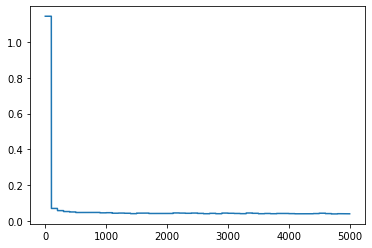

In [16]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [17]:
test_accuracy = sess.run(accuracy, feed_dict={input_x: x.test.images, output_y: x.test.labels, keep_prob: 1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.8592


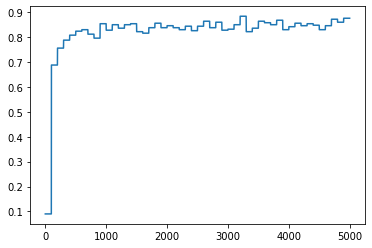

In [18]:
plt.plot(train_accuracy_list)

In [27]:
input_x1 = tf.placeholder(tf.float32, [None, 784])
output_y1 = tf.placeholder(tf.float32, [None, 10])
keep_prob1 = tf.placeholder(tf.float32)

In [28]:
weights1 = {
    'w11': tf.Variable(tf.truncated_normal([784, 300], stddev=0.05)),
    'w31': tf.Variable(tf.truncated_normal([300, 100], stddev=0.05)),
    'out1': tf.Variable(tf.truncated_normal([100, 10], stddev=0.05)),
}
biases1 = {
    'b11': tf.Variable(tf.constant(.01, shape=[300])),
    'b31': tf.Variable(tf.constant(.01, shape=[100])),
    'out1': tf.Variable(tf.constant(.01, shape=[10]))
}
layer_11 = tf.add(tf.matmul(input_x1, weights1['w11']), biases1['b11'])
layer_31 = tf.add(tf.matmul(layer_11, weights1['w31']), biases1['b31'])
layer_drop1 = tf.nn.dropout(layer_31, keep_prob1)
output_layer1 = tf.matmul(layer_31, weights1['out1']) + biases1['out1']

In [29]:
loss1 = tf.losses.mean_squared_error(output_y1, output_layer1)
train_op1 = tf.train.AdamOptimizer(1e-4).minimize(loss1)

In [30]:
correct_pred1 = tf.equal(tf.argmax(output_layer1, 1), tf.argmax(output_y1, 1))
accuracy1 = tf.reduce_mean(tf.cast(correct_pred1, tf.float32))

In [31]:
sess = tf.Session()

In [32]:
sess.run(tf.global_variables_initializer())

In [33]:
# train on mini batches
import random as rd
loss_list1=[]
train_accuracy_list1 = []
for i in range(10000):
    batch_x1, batch_y1 = x.train.next_batch(500)
    sess.run(train_op1, feed_dict={input_x1: batch_x1, output_y1: batch_y1, keep_prob1: 0.5})

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss1, minibatch_accuracy1 = sess.run([loss1, accuracy1],feed_dict={input_x1: batch_x1, output_y1: batch_y1, keep_prob1: 1.0})
        print("Iteration",str(i),"\t| Loss =",str(minibatch_loss1),"\t| Accuracy =",str(minibatch_accuracy1))
    loss_list1.append(float(minibatch_loss1))
    train_accuracy_list1.append(float(minibatch_accuracy1))

Iteration 0 	| Loss = 0.102226995 	| Accuracy = 0.168
Iteration 100 	| Loss = 0.04484537 	| Accuracy = 0.83
Iteration 200 	| Loss = 0.04087167 	| Accuracy = 0.848
Iteration 300 	| Loss = 0.039915513 	| Accuracy = 0.866
Iteration 400 	| Loss = 0.041804932 	| Accuracy = 0.836
Iteration 500 	| Loss = 0.042812392 	| Accuracy = 0.84
Iteration 600 	| Loss = 0.041755933 	| Accuracy = 0.83
Iteration 700 	| Loss = 0.040120214 	| Accuracy = 0.85
Iteration 800 	| Loss = 0.03758688 	| Accuracy = 0.856
Iteration 900 	| Loss = 0.03894215 	| Accuracy = 0.856
Iteration 1000 	| Loss = 0.034782264 	| Accuracy = 0.896
Iteration 1100 	| Loss = 0.037137073 	| Accuracy = 0.864
Iteration 1200 	| Loss = 0.038425438 	| Accuracy = 0.852
Iteration 1300 	| Loss = 0.040733643 	| Accuracy = 0.83
Iteration 1400 	| Loss = 0.038144648 	| Accuracy = 0.86
Iteration 1500 	| Loss = 0.039055128 	| Accuracy = 0.856
Iteration 1600 	| Loss = 0.03719441 	| Accuracy = 0.874
Iteration 1700 	| Loss = 0.041515246 	| Accuracy = 0.8

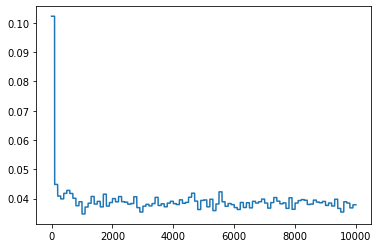

In [34]:
import matplotlib.pyplot as plt
plt.plot(loss_list1)

In [35]:
test_accuracy1 = sess.run(accuracy1, feed_dict={input_x1: x.test.images, output_y1: x.test.labels, keep_prob1: 1.0})
print("\nAccuracy on test set:", test_accuracy1)


Accuracy on test set: 0.8595


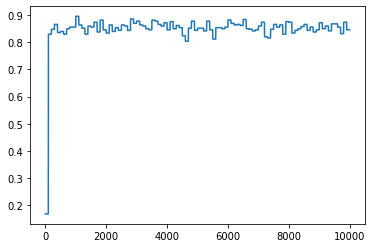

In [36]:
plt.plot(train_accuracy_list1)

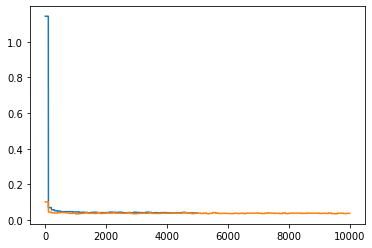

In [37]:
plt.plot(loss_list)
plt.plot(loss_list1)

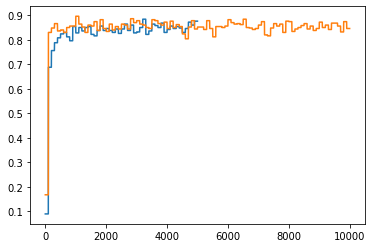

In [38]:
plt.plot(train_accuracy_list)
plt.plot(train_accuracy_list1)

In [39]:
input_x2 = tf.placeholder(tf.float32, [None, 784])
output_y2 = tf.placeholder(tf.float32, [None, 10])
keep_prob2 = tf.placeholder(tf.float32)

In [51]:
weights2 = {
    'w12': tf.Variable(tf.truncated_normal([784, 500], stddev=0.1)),
    'w22': tf.Variable(tf.truncated_normal([500, 400], stddev=0.1)),
    'w32': tf.Variable(tf.truncated_normal([400, 300], stddev=0.1)),
    'w42': tf.Variable(tf.truncated_normal([300, 200], stddev=0.1)),
    'w52': tf.Variable(tf.truncated_normal([200, 100], stddev=0.1)),
    'w62': tf.Variable(tf.truncated_normal([100, 50], stddev=0.1)),
    'w72': tf.Variable(tf.truncated_normal([50, 30], stddev=0.1)),
    'out2': tf.Variable(tf.truncated_normal([30, 10], stddev=0.1)),
}
biases2 = {
    'b12': tf.Variable(tf.constant(.01, shape=[500])),
    'b22': tf.Variable(tf.constant(.02, shape=[400])),
    'b32': tf.Variable(tf.constant(.03, shape=[300])),
    'b42': tf.Variable(tf.constant(.04, shape=[200])),
    'b52': tf.Variable(tf.constant(.05, shape=[100])),
    'b62': tf.Variable(tf.constant(.06, shape=[50])),
    'b72': tf.Variable(tf.constant(.07, shape=[30])),
    'out2': tf.Variable(tf.constant(.08, shape=[10]))
}
layer_12 = tf.add(tf.matmul(input_x2, weights2['w12']), biases2['b12'])
layer_22 = tf.add(tf.matmul(layer_12, weights2['w22']), biases2['b22'])
layer_32 = tf.add(tf.matmul(layer_22, weights2['w32']), biases2['b32'])
layer_42 = tf.add(tf.matmul(layer_32, weights2['w42']), biases2['b42'])
layer_52 = tf.add(tf.matmul(layer_42, weights2['w52']), biases2['b52'])
layer_62 = tf.add(tf.matmul(layer_52, weights2['w62']), biases2['b62'])
layer_72 = tf.add(tf.matmul(layer_62, weights2['w72']), biases2['b72'])
layer_drop2 = tf.nn.dropout(layer_72, keep_prob2)
output_layer2 = tf.matmul(layer_72, weights2['out2']) + biases2['out2']

In [52]:
loss2 = tf.losses.mean_squared_error(output_y2, output_layer2)
train_op2 = tf.train.AdamOptimizer(1e-2).minimize(loss2)

In [53]:
correct_pred2 = tf.equal(tf.argmax(output_layer2, 1), tf.argmax(output_y2, 1))
accuracy2 = tf.reduce_mean(tf.cast(correct_pred2, tf.float32))

In [54]:
sess = tf.Session()# control training and others

In [55]:
sess.run(tf.global_variables_initializer())# initialize var in graph

In [56]:
# train on mini batches
import random as rd
loss_list2=[]
train_accuracy_list2 = []
for i in range(10000):
    batch_x2, batch_y2 = x.train.next_batch(500)
    sess.run(train_op2, feed_dict={input_x2: batch_x2, output_y2: batch_y2, keep_prob2: 0.5})

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss2, minibatch_accuracy2 = sess.run([loss2, accuracy2],feed_dict={input_x2: batch_x2, output_y2: batch_y2, keep_prob2: 1.0})
        print("Iteration",str(i),"\t| Loss =",str(minibatch_loss2),"\t| Accuracy =",str(minibatch_accuracy2))
    loss_list2.append(float(minibatch_loss2))
    train_accuracy_list2.append(float(minibatch_accuracy2))

Iteration 0 	| Loss = 35.31541 	| Accuracy = 0.114
Iteration 100 	| Loss = 4.479468 	| Accuracy = 0.062
Iteration 200 	| Loss = 1.6605344 	| Accuracy = 0.104
Iteration 300 	| Loss = 0.98394376 	| Accuracy = 0.124
Iteration 400 	| Loss = 0.6686926 	| Accuracy = 0.122
Iteration 500 	| Loss = 0.5292558 	| Accuracy = 0.15
Iteration 600 	| Loss = 0.42096144 	| Accuracy = 0.13
Iteration 700 	| Loss = 0.37357497 	| Accuracy = 0.188
Iteration 800 	| Loss = 0.31969494 	| Accuracy = 0.202
Iteration 900 	| Loss = 0.26628682 	| Accuracy = 0.258
Iteration 1000 	| Loss = 0.2629933 	| Accuracy = 0.25
Iteration 1100 	| Loss = 0.22833876 	| Accuracy = 0.328
Iteration 1200 	| Loss = 0.20229013 	| Accuracy = 0.324
Iteration 1300 	| Loss = 0.19135971 	| Accuracy = 0.36
Iteration 1400 	| Loss = 0.17720513 	| Accuracy = 0.37
Iteration 1500 	| Loss = 0.16605231 	| Accuracy = 0.394
Iteration 1600 	| Loss = 0.14498018 	| Accuracy = 0.442
Iteration 1700 	| Loss = 0.1386248 	| Accuracy = 0.462
Iteration 1800 	| 

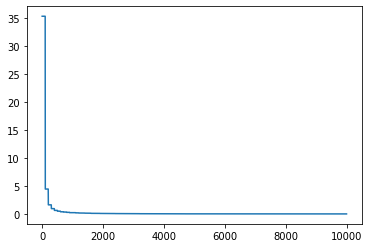

In [57]:
import matplotlib.pyplot as plt
plt.plot(loss_list2)

In [58]:
test_accuracy2 = sess.run(accuracy2, feed_dict={input_x2: x.test.images, output_y2: x.test.labels, keep_prob2: 1.0})
print("\nAccuracy on test set:", test_accuracy2)


Accuracy on test set: 0.8532


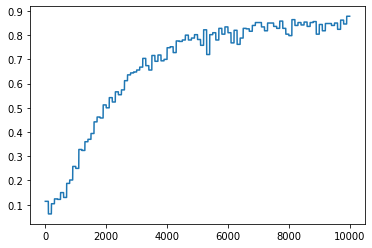

In [59]:
plt.plot(train_accuracy_list2)

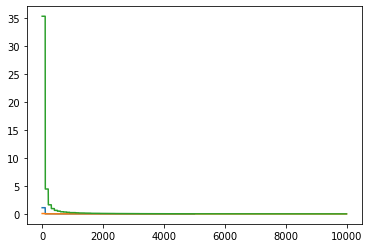

In [60]:
plt.plot(loss_list)
plt.plot(loss_list1)
plt.plot(loss_list2)

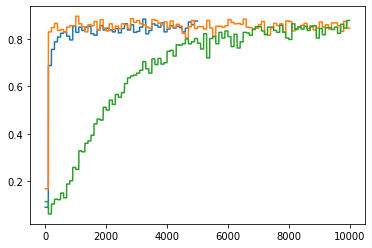

In [61]:
plt.plot(train_accuracy_list)
plt.plot(train_accuracy_list1)
plt.plot(train_accuracy_list2)